# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint as pp 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [65]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

599


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = '{}appid={}&units=imperial&q='.format(url, weather_api_key)
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=14be05634fb4f17e44c07e7f11173b8d&units=imperial&q=


In [67]:
response = requests.get(query_url + "seattle").json()
pp.pprint(response)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 47.61, 'lon': -122.33},
 'dt': 1604789358,
 'id': 5809844,
 'main': {'feels_like': 37.08,
          'humidity': 75,
          'pressure': 1006,
          'temp': 42.12,
          'temp_max': 44.01,
          'temp_min': 41},
 'name': 'Seattle',
 'sys': {'country': 'US',
         'id': 5692,
         'sunrise': 1604761406,
         'sunset': 1604796161,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 0, 'speed': 3.36}}


In [68]:
response['clouds']['all']

90

In [69]:
print('Begining Data Retrieval')
print('-----------------------')
record_counter = 0
city_list = []	
lat	= []
lon	= []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
country	= []
date = []
# sets = len(cities)//50 + 1
 

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_list.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        record_counter += 1
        print("Processing Record {}| {} ".format(record_counter, city))
    except:
        record_counter += 1
        print("Record {}. City not found. Skipping...".format(record_counter))
        pass

print('-----------------------')
print("Data Retrieval Complete")

Begining Data Retrieval
-----------------------
Processing Record 1| punta arenas 
Processing Record 2| kargil 
Processing Record 3| gushikawa 
Processing Record 4| saint-philippe 
Processing Record 5| padang 
Processing Record 6| akhmim 
Record 7. City not found. Skipping...
Processing Record 8| road town 
Processing Record 9| puerto ayora 
Processing Record 10| port alfred 
Processing Record 11| cape town 
Processing Record 12| visby 
Processing Record 13| esperance 
Processing Record 14| hermanus 
Record 15. City not found. Skipping...
Processing Record 16| nizwa 
Processing Record 17| jamestown 
Processing Record 18| kukmor 
Processing Record 19| mataura 
Processing Record 20| biak 
Processing Record 21| knysna 
Processing Record 22| nikolskoye 
Processing Record 23| micheweni 
Processing Record 24| arman 
Processing Record 25| bell ville 
Processing Record 26| hay river 
Processing Record 27| hambantota 
Processing Record 28| carnarvon 
Processing Record 29| mahebourg 
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
city_data = pd.DataFrame({
    "City": city_list,
    "Lat": lat,
    "Lon": lon,
    "Temp Max": temp_max,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind Speed":wind_speed,
    "Country": country, 
    "Date": date
})
city_data.head()

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,57.20,58,40,32.21,CL,1604789626
1,Kargil,34.57,76.10,23.85,69,0,1.36,IN,1604789693
2,Gushikawa,26.35,127.87,75.20,100,1,6.93,JP,1604789693
3,Saint-Philippe,-21.36,55.77,71.60,77,0,5.82,RE,1604789694
4,Padang,-0.95,100.35,76.84,84,100,5.79,ID,1604789694


In [71]:
city_data.to_csv("Cities_Output_JK.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [72]:
city_data.loc[city_data['Humidity']>100]

,City,Lat,Lon,Temp Max,Humidity,Cloudiness,Wind Speed,Country,Date


In [73]:
#  Get the indices of cities that have humidity over 100%.


In [74]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Temperature (F) vs. Latitude


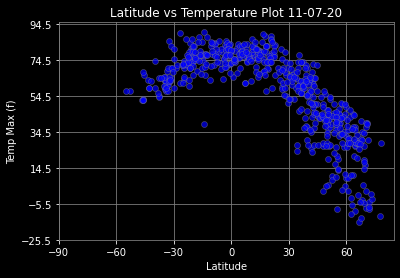

In [85]:
lat_vs_temp = city_data.copy()
lat_vs_temp = lat_vs_temp[["City", "Lat","Temp Max"]]
lat_vs_temp_x = lat_vs_temp["Lat"]
lat_vs_temp_y = lat_vs_temp["Temp Max"]

plt.plot(lat_vs_temp_x, lat_vs_temp_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.7)
plt.title("Latitude vs Temperature Plot 11-07-20", color='white')
plt.xlabel("Latitude", color='white')
plt.ylabel("Temp Max (f)", color='white')
plt.xticks(np.arange(-90,90, 30), color='white')
plt.yticks(np.arange((min(lat_vs_temp["Temp Max"])-10), (max(lat_vs_temp["Temp Max"])+10), 20), color='white')
ax = plt.axes()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey') 
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.grid(b=True, which='major', axis='both', color='grey')

print("Temperature (F) vs. Latitude")
plt.savefig("Temperature (F) vs. Latitude.png")
plt.show()

## Latitude vs. Humidity Plot

Humidity (%) vs. Latitude


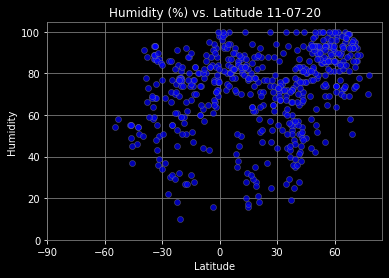

In [86]:
lat_vs_hum = city_data.copy()
lat_vs_hum = lat_vs_hum[["City", "Lat","Humidity"]]
lat_vs_hum_x = lat_vs_hum["Lat"]
lat_vs_hum_y = lat_vs_hum["Humidity"]

plt.plot(lat_vs_hum_x, lat_vs_hum_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.7)
plt.title("Humidity (%) vs. Latitude 11-07-20", color='white')
plt.xlabel("Latitude", color='white')
plt.ylabel("Humidity", color='white')
plt.xticks(np.arange(-90,90, 30), color='white')
plt.yticks(np.arange((min(lat_vs_hum["Humidity"])-10), (max(lat_vs_hum["Humidity"])+10), 20), color='white')
ax = plt.axes()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey') 
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.grid(b=True, which='major', axis='both', color='grey')

print('Humidity (%) vs. Latitude')
plt.savefig("Humidity(%) vs. Latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

Cloudiness (%) vs. Latitude


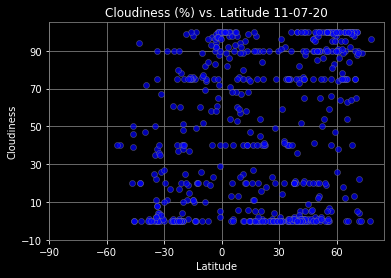

In [87]:
lat_vs_cld = city_data.copy()
lat_vs_cld = lat_vs_cld[["City", "Lat","Cloudiness"]]
lat_vs_cld_x = lat_vs_cld["Lat"]
lat_vs_cld_y = lat_vs_cld["Cloudiness"]

plt.plot(lat_vs_cld_x, lat_vs_cld_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.7)
plt.title("Cloudiness (%) vs. Latitude 11-07-20", color='white')
plt.xlabel("Latitude", color='white')
plt.ylabel("Cloudiness", color='white')
plt.xticks(np.arange(-90,90, 30), color='white')
plt.yticks(np.arange((min(lat_vs_cld["Cloudiness"])-10), (max(lat_vs_cld["Cloudiness"])+10), 20), color='white')
ax = plt.axes()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey') 
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.grid(b=True, which='major', axis='both', color='grey')

print('Cloudiness (%) vs. Latitude')
plt.savefig("Cloudiness(%) vs. Latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

Wind Speed (mph) vs. Latitude


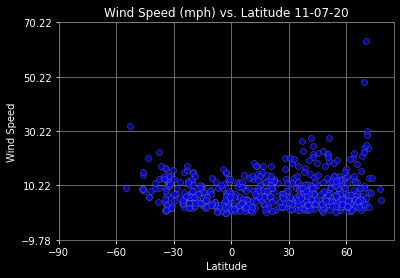

In [88]:
lat_vs_wind = city_data.copy()
lat_vs_wind = lat_vs_wind[["City", "Lat","Wind Speed"]]
lat_vs_wind_x = lat_vs_wind["Lat"]
lat_vs_wind_y = lat_vs_wind["Wind Speed"]

plt.plot(lat_vs_wind_x, lat_vs_wind_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.7)
plt.title("Wind Speed (mph) vs. Latitude 11-07-20", color='white')
plt.xlabel("Latitude", color='white')
plt.ylabel("Wind Speed", color='white')
plt.xticks(np.arange(-90,90, 30), color='white')
plt.yticks(np.arange((min(lat_vs_wind["Wind Speed"])-10), (max(lat_vs_wind["Wind Speed"])+10), 20), color='white')
ax = plt.axes()
ax.set_facecolor('black')
ax.spines['bottom'].set_color('grey')
ax.spines['top'].set_color('grey') 
ax.spines['right'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.grid(b=True, which='major', axis='both', color='grey')

print('Wind Speed (mph) vs. Latitude')
plt.savefig("Wind Speed(mph) vs. Latitude.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
hemis = ["Northern Hemisphere", "Southern Hemisphere"]
measures = ["Temp Max","Humidity", "Cloudiness","Wind Speed"]


Northern Hemisphere - Temp Max vs. Latitude
The r value is : -0.8433234587387904
--------------------------------------------
--------------------------------------------


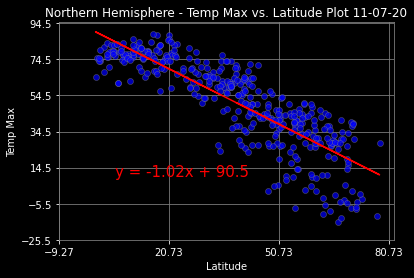

Southern Hemisphere - Temp Max vs. Latitude
The r value is : 0.6486271878537154
--------------------------------------------
--------------------------------------------


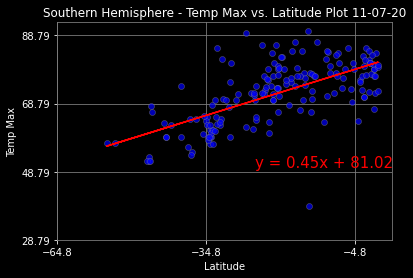

Northern Hemisphere - Humidity vs. Latitude
The r value is : 0.2540187468507118
--------------------------------------------
--------------------------------------------


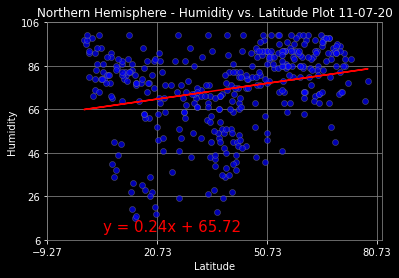

Southern Hemisphere - Humidity vs. Latitude
The r value is : 0.2272255658012183
--------------------------------------------
--------------------------------------------


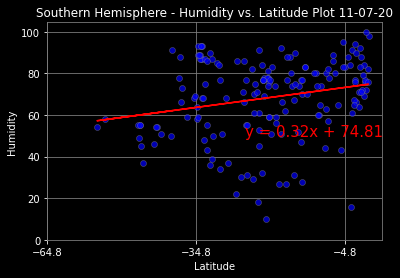

Northern Hemisphere - Cloudiness vs. Latitude
The r value is : 0.18910769769760463
--------------------------------------------
--------------------------------------------


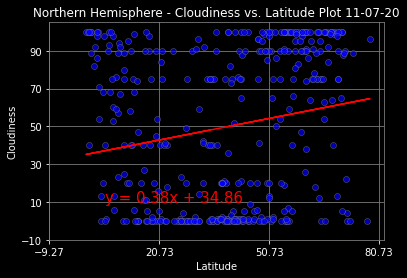

Southern Hemisphere - Cloudiness vs. Latitude
The r value is : 0.48680489094582574
--------------------------------------------
--------------------------------------------


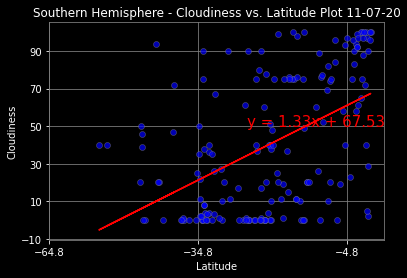

Northern Hemisphere - Wind Speed vs. Latitude
The r value is : 0.17639458911313202
--------------------------------------------
--------------------------------------------


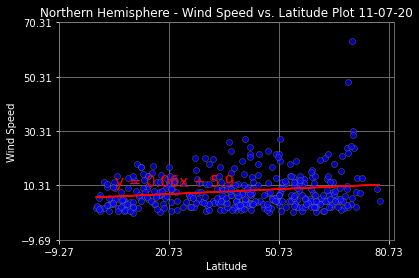

Southern Hemisphere - Wind Speed vs. Latitude
The r value is : -0.3328354980645937
--------------------------------------------
--------------------------------------------


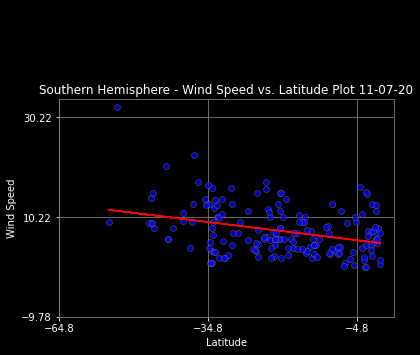

In [89]:
for measure in measures:
    for hemi in hemis:
        lat_regress = city_data.copy()
        if hemi == "Northern Hemisphere":
            lat_regress = lat_regress.loc[lat_regress['Lat']>0]
        else:
            lat_regress = lat_regress.loc[lat_regress['Lat']<0]
        lat_regress = lat_regress[["City", "Lat","Temp Max","Humidity", "Cloudiness","Wind Speed"]]
        lat_regress_x = lat_regress['Lat']
        lat_regress_y = lat_regress[measure]

        x_values = lat_regress['Lat']
        y_values = lat_regress[measure]
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


        plt.plot(lat_regress_x, lat_regress_y, 'o',markerfacecolor = 'blue', markeredgecolor='grey', markeredgewidth=.5, alpha=.7)
        plt.title("{} - {} vs. Latitude Plot 11-07-20".format(hemi, measure), color='white')
        plt.plot(x_values,regress_values,"r-")
        if hemi == "Northern Hemisphere":
            plt.annotate(line_eq,(6,10),fontsize=15,color="red")
        else:
            plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
        
        plt.xlabel("Latitude", color='white')
        plt.ylabel(measure, color='white')
        plt.xticks(np.arange((min(lat_regress['Lat'])-10), (max(lat_regress['Lat'])+10), 30), color='white')
        plt.yticks(np.arange((min(lat_regress[measure])-10), (max(lat_regress[measure])+10), 20), color='white')
        ax = plt.axes()
        ax.set_facecolor('black')
        ax.spines['bottom'].set_color('grey')
        ax.spines['top'].set_color('grey') 
        ax.spines['right'].set_color('grey')
        ax.spines['left'].set_color('grey')
        ax.grid(b=True, which='major', axis='both', color='grey')
        
        print("{} - {} vs. Latitude".format(hemi, measure))
        print("The r value is : {}".format(rvalue))
        print('--------------------------------------------')
        print('--------------------------------------------')
        plt.savefig("{} - {} vs. Latitude.png".format(hemi, measure))
        plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression